In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
customers = pd.read_csv('https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%201/Data/customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
points = customers.iloc[:,3:5].values
X=points[:,0]
y=points[:,1]

Text(0, 0.5, 'Spending Score')

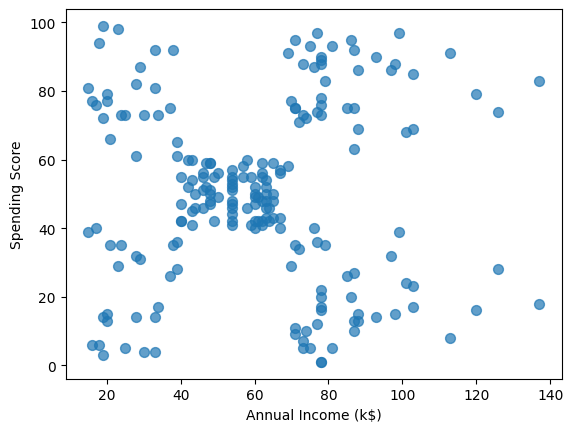

In [ ]:
plt.scatter(X, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

In [ ]:
from sklearn.cluster import KMeans


[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


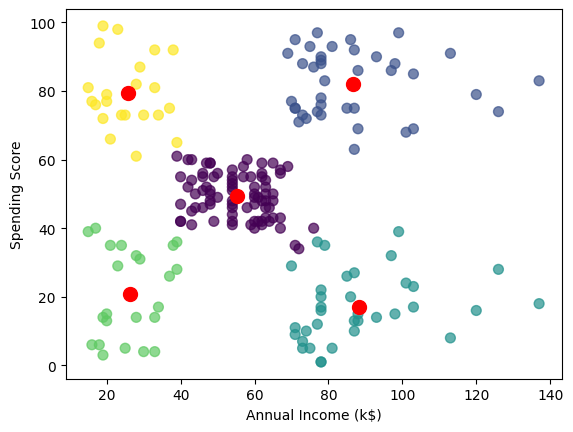

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(X, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis') #c segments it into 5 groups/clusters
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

centers = kmeans.cluster_centers_ #plotting center of each cluster
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

The customers in the lower-right quadrant of the chart might be good ones to target
with a promotion to increase their spending. Why? Because they have high incomes
but low spending scores. Use the following statements to create a copy of the Data
Frame and add a column named Cluster containing cluster indexes:

In [ ]:
df = customers.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


Now use the following code to output the IDs of customers who have high incomes
but low spending scores:


In [ ]:
# Get the cluster index for a customer with a high income  and low spending score
cluster = kmeans.predict(np.array([[120, 20]]))[0]

# Filter the DataFrame to include only customers in that cluster
clustered_df = df[df['Cluster'] == cluster]

# Show the customer IDs
clustered_df['CustomerID'].values


array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

The key here is that you used clustering to group customers by annual income and
spending score. Once customers are grouped in this manner, it’s a simple matter to
enumerate the customers in each cluster.

<h1>Segmenting Customers Using More Than Two Dimensions</h1>

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Text(0, 0.5, 'Inertia')

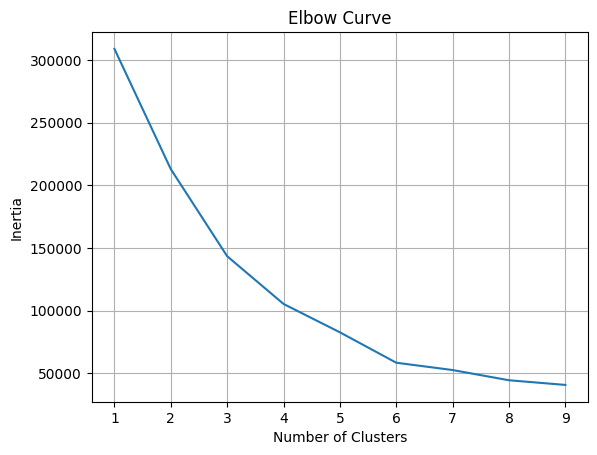

In [ ]:
points = df.iloc[:, 1:5].values
inertias = []
for i in range(1, 10):
 kmeans = KMeans(n_clusters=i, random_state=0)
 kmeans.fit(points)
 inertias.append(kmeans.inertia_)
plt.plot(range(1, 10), inertias)
plt.grid(True)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(points)
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,5
2,3,0,20,16,6,2
3,4,0,23,16,77,5
4,5,0,31,17,40,2


In [ ]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income',
 'Average Spending Index', 'Number of Females',
 'Number of Males'])
for i, center in enumerate(kmeans.cluster_centers_):
 age = center[1] # index of age or Average age for current cluster
 income = center[2] # Average income for current cluster
 spend = center[3] # Average spending score for current cluster
 gdf = df[df['Cluster'] == i]
 females = gdf[gdf['Gender'] == 0].shape[0]
 males = gdf[gdf['Gender'] == 1].shape[0]
 results.loc[i] = ([i, age, income, spend, females, males])
results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,56.340909,53.704545,49.386364,25.0,19.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,44.318182,25.772727,20.272727,13.0,9.0
3,3.0,41.647059,88.735294,16.764706,15.0,19.0
4,4.0,27.315789,57.500000,48.447368,24.0,14.0


Among the more interesting insights that clustering reveals is that some of the biggest
spenders are young people (average age = 25.5) with modest incomes. Those custom‐
ers are more likely to be female than male. All of this is useful information to have if
you’re growing a company and want to better understand the demographics that you
serve.